# Tujuan yang ingin di capai
Optimasi Campaign Results terkait penawaran produk baru,sehingga mendapatkan profit yang maksimal di bulan depan dan memahami karakteristik customers yang menerima penawaran produk baru tersebut.

 # Data Quality Check
- Q1: Apakah ada features yang data type-nya tidak sesuai?
- Q2: Adakah duplicate, missing values atau outliers? Bagaimana mengatasi hal-hal tersebut?
- Q3: Apakah terdapat distribusi yang tidak masuk akal?

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#untuk mengatur agar columns nya tidak ke hidden
pd.set_option('display.max_columns', None)

sns.set_context('notebook')
sns.set_style('whitegrid')
#sns.set_palette('Spectral')
sns.set_palette('Spectral')

import warnings
warnings.filterwarnings('ignore')

#df = pd.read_csv('Documents/belajar/data-analyst/Marketing-Analytics-main/marketing_data.csv')
df = pd.read_csv('marketing_data.csv')

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [9]:
df.shape

(2240, 28)

## Pertanyaan 1
Apakah ada features yang data type-nya tidak sesuai?


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

Disini kita bisa melihat kolom-kolom apa saja yang dataset kita punya.
Di Dataset kita ada sebanyak 28 columns,dan kita juga bisa melihat data type nya,ada ID,Year_Birth,Education,dan lain lain.

Disini kita harusnya mengecek satu persatu untuk data type nya,apakah ID itu integer,dan itu benar,dan disini income data type nya object,harusnya data type nya integer atau float,disini juga ada Dt_Customer,ini harusnya datatype nya berupa tanggal bukan object.

In [11]:
# Kesimpulan : Income,Dt_Customer

Selain menggunakan ```df.info``` untuk menemukan datatype nya ini sesuai atau tidak sesuai,kita juga bisa menggunakan looping sederhana.

In [12]:
for dtype, col in (list(zip(df.dtypes, df.columns))):
    if dtype == 'int64' or dtype == 'float64':
        print(col, dtype)
        print(df[col].min(), df[col].max())
    else:
        print(col, dtype)
        print(df[col].unique())
    print()
    

ID int64
0 11191

Year_Birth int64
1893 1996

Education object
['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']

Marital_Status object
['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']

 Income  object
['$84,835.00 ' '$57,091.00 ' '$67,267.00 ' ... '$46,310.00 ' '$65,819.00 '
 '$94,871.00 ']

Kidhome int64
0 2

Teenhome int64
0 2

Dt_Customer object
['6/16/14' '6/15/14' '5/13/14' '5/11/14' '4/8/14' '3/17/14' '1/29/14'
 '1/18/14' '1/11/14' '12/27/13' '12/9/13' '12/7/13' '10/16/13' '10/5/13'
 '9/11/13' '8/1/13' '7/23/13' '7/1/13' '5/28/13' '3/26/13' '3/15/13'
 '2/12/13' '11/23/12' '10/13/12' '9/14/12' '6/29/14' '5/31/14' '5/30/14'
 '4/27/14' '4/11/14' '10/29/13' '10/9/13' '5/10/13' '5/9/13' '4/25/13'
 '4/20/13' '3/30/13' '3/1/13' '2/14/13' '1/11/13' '1/3/13' '12/19/12'
 '12/15/12' '12/2/12' '9/17/12' '9/11/12' '5/12/14' '4/28/14' '3/29/14'
 '3/6/14' '3/4/14' '2/4/14' '2/3/14' '1/1/14' '12/12/13' '11/15/13'
 '9/20/13' '9/5/13' '8/31/13' '7/30/13' '7/27/13' '6/22/1

**Disini ada typo sedikit,kita harus memperbaiki ini**

Jadi disini Kita akan membersihkan semua nama kolom yang mempunyai spasi atau whitespace yang ga berguna

In [13]:
#df.columns = df.columns.str.replace(' ','')
df.columns = df.columns.str.strip()  # Hanya menghapus spasi di awal/akhir

In [14]:
df.Income

0       $84,835.00 
1       $57,091.00 
2       $67,267.00 
3       $32,474.00 
4       $21,474.00 
           ...     
2235    $66,476.00 
2236    $31,056.00 
2237    $46,310.00 
2238    $65,819.00 
2239    $94,871.00 
Name: Income, Length: 2240, dtype: object

**KIta juga perlu melakukan replace income untuk dolar sign dan juga koma nya,karena koma dan dollar sign Income ini penyebab data type Income  menjadi Object**

In [15]:
df['Income'] = df['Income'].str.replace('$', '')
df['Income'] = df['Income'].str.replace(',', '')

In [16]:
df.Income

0       84835.00 
1       57091.00 
2       67267.00 
3       32474.00 
4       21474.00 
          ...    
2235    66476.00 
2236    31056.00 
2237    46310.00 
2238    65819.00 
2239    94871.00 
Name: Income, Length: 2240, dtype: object

**Selanjutnya kita ubah menjadi float**

In [17]:
df['Income'] = df['Income'].astype('float')

**KIta juga perlu mengubah Dt_Customer dari Object menjadi datetime**

In [18]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

**Sekarang kita lihat lagi dengan df.info()**

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

**Disini Dt_Customer nya sudah menjadi datetime dan juga Income nya sudah menjadi float.**

## Pertanyaan 2
Adakah duplicate, missing values atau outliers? Bagaimana mengatasi hal-hal tersebut?

### Duplicates
Di dalam pandas, cara kita untuk mengecek apakah di suatu kolom atau di suatu dataframe ada duplicate atau tidak,kita bisa menggunakan function duplicated

In [20]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Length: 2240, dtype: bool

Disini kita langsung di berikan nilai ```False```,apakah row pertama dan row kedua itu sama atau ada yang mirip dengan yang lain,jika nilai nya ```False``` berarti tidak ada dan jika ```True``` itu artinya ada.

Karena di dalam pemrograman ```False``` itu bernilai 0 dan ```True``` ini bernilai 1,maka kita bisa melakukan ```sum```,jika ini terdapat duplicated maka ```sum``` nya akan bernilai lebih dari 0,dan jika nilai nya 0 maka tidak ada duplicated.

In [21]:
df.duplicated().sum()

np.int64(0)

### Missing Values

In [22]:
df.isna().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Country                 0
dtype: int64

Bisa kita lihat,kita hanya memiliki satu features yang memiliki missing values,yaitu Income.


Pertanyaaan nya,apakah missing values ini mustahil jika customer kita tidak memiliki income?.Kemungkinan besar kan kurang mustahil,pasti orang-orang yang membeli produk kita itu pasti punya income,jadi kita harus mengisi nilai missing values ini.


Untuk mengisi nilai Missing values ini,kita dapat mengisi nya dengan mean ataupun median.

Pertanyaan nya,mana yang paling tepat?,apakah mean atau median?

Pertanyaan ini bisa kita jawab ketika kita sudah melihat distribusi dari Income ini.

<Axes: xlabel='Income'>

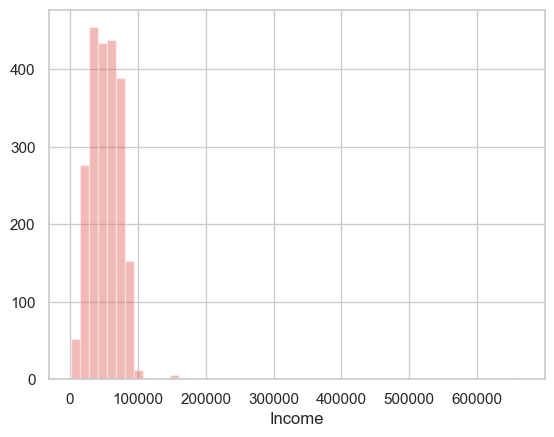

In [23]:
sns.distplot(df['Income'], kde=False, hist=True)

Disini bisa kita lihat ada salah satu box kecil yang artinya kita memiliki outliers.

Atau kita bisa mem plot nya secara lebih bagus dengan menggunkan box plot.

<Axes: >

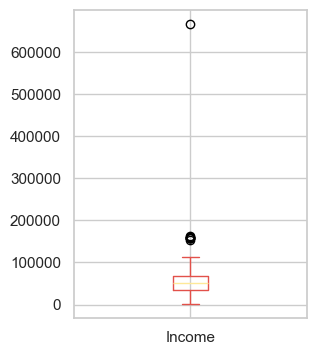

In [24]:
df['Income'].plot(kind='box', figsize=(3,4))

Disini terdapat outlier yang sangat jauh,oleh karena itu untuk mengisi missing values di Income kita akan menggunakan median,karena median itu tahan banting terhadap missing values.

In [25]:
df['Income'] = df['Income'].fillna(df['Income'].median())

### Outliers
Karena kita sudah melakukan pengecekan terhadap seluruh nilai unique untuk object,kita bisa melihatnya secara langsung dari lopping di atas.

Untuk variabel numerik atau continous,kita akan melihatnya dengan boxplot,karena itu lebih mudah.

In [26]:
df_to_plot = df.select_dtypes(include=['float','int'])
df_to_plot.drop(columns=['ID','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                               'AcceptedCmp4', 'AcceptedCmp5', 'Response' , 'Complain'],
               inplace=True)

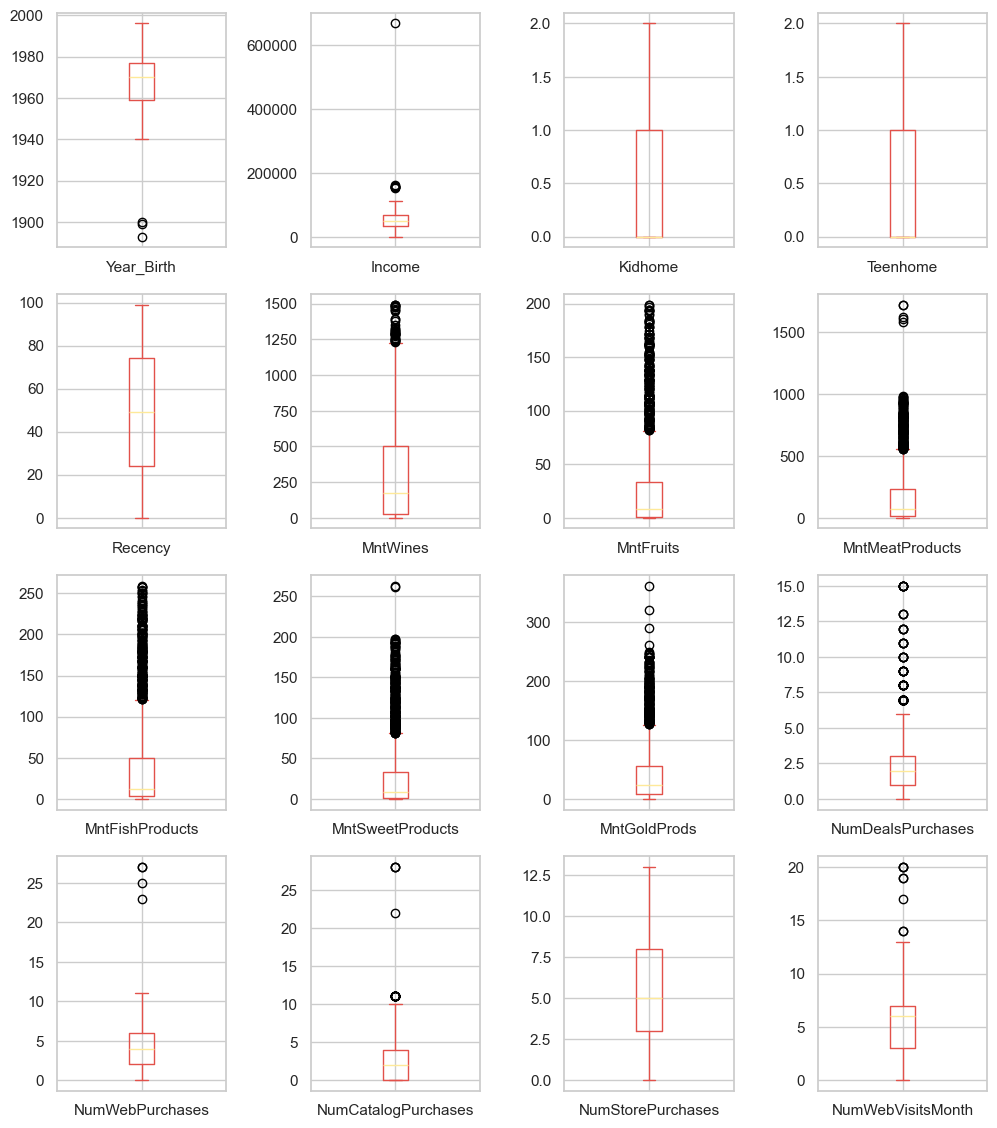

In [27]:
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14))
plt.subplots_adjust(wspace=0.5);

Disini kita bisa lihat di Year_Birth,itu ada orang yang lahir sebelum tahun 1900,ini kurang masuk akal,karena apakah mungkin ada orang yang masih hidup sudah lebih dari 120 tahun,kita akan meremove orang-orang yang lahir sebelum tahun 1940 karena itu gak masuk akal,mungkin mereka typo.

Untuk Income masih masuk akal,karena mungkin saja ada orang yang sangat-sangat kaya dan ada yang biasa-biasa saja.

Dan untuk yang lainnya terlihat baik dan tidak ada yang aneh,karena tidak ada yang kurang dari 0,,kalau kurang dri 0 itu kurang masuk akal juga.

Untuk Outliers kita hanya menemukan satu saja,sebenarnya banyak outliers nya,tapi kebanyakan itu outliers masuk akal jadi kita biarkan saja.Untuk outliers yang tidak masuk akal disini hanya Year_Birth saja,jadi kita akan meremove Year_Birth ini.

In [28]:
df = df[df['Year_Birth'] > 1900].reset_index(drop=True)

## 

Pertanyaan 3
Apakah terdapat distribusi yang tidak masuk akal?

Untuk menjawab pertanyaan ini,kita akan melihat nya secara histogram bukan secara boxplot,karena boxplot lebih enak untuk melihat outliers.Maka dari itu kita akan melihat seluruh distribusi,seluruh variabel-variabel numerik atau continous secara histogram.

Untuk melakukan itu,kita harus tahu dulu kolom yang akan kita gunakan untuk mem plot nya.

In [29]:
numeric = df_to_plot.columns

In [30]:
numeric

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')

Ini adalah kolom-kolom yang akan kita plot untuk mencari tahu distribusi

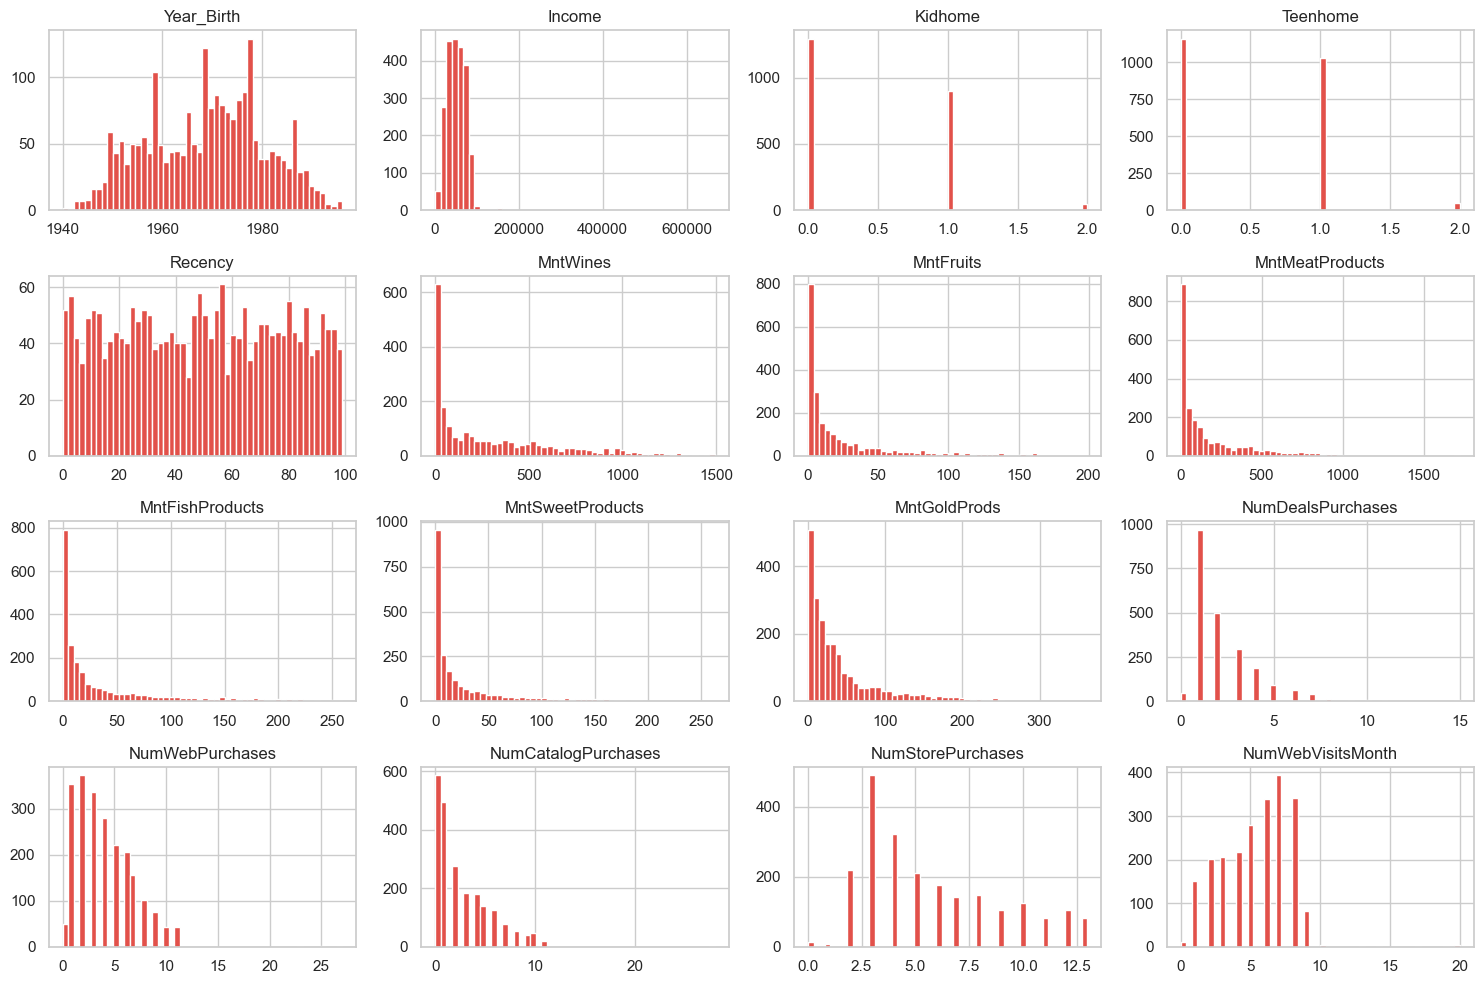

In [31]:
fig = plt.figure(figsize=(15,10))
ax = plt.gca()

df.hist(bins=50, ax=ax, layout=(4,4), column=numeric)
plt.tight_layout()
plt.show()

Kurang lebih secara distribusi itu juga aman,jadi kesimpulan dari apakah ada distribusi yang tidak masuk akal adalah tidak ada.

# Data Insight
Sebalumnya kita sudah membahas Terkait Data Quality.

Sekarang kita masuk ke tahapan Data Exploratory yang lain,yaitu Data Insight

Dimana untuk Data Insight ini kita akan melihat semua insight dari semua kolom yang ada,dan kita akan melihat apakah ada suatu patern dari kolom-kolom ini dengan variabel target kita,yaitu Respons.

Karena kita ingin melihat data insight dari semua kolom yang ada,kita perlu tahu dulu kolom-kolom apa saja yang kita punya,kita dapat melihatnya dengan ```df.head()```

In [32]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


Disini kita melihat ada kolom ID,Year_Birth,Education,dan sampai ke country.

KIta akan mulai dari ujung paling kiti dulu yaitu ID,untuk ID,karena ini hanya untuk indexing,tidak memaknai apa-apa,maka kita bisa mengabaikan nya,kita tidak perlu melakukan analisis untuk kolom ID ini.

Dan untuk Year_Birth,kita bisa melihat di rentang umur berapa sih yang paling banyak menerima penawaran campaign ini,atau dengan kata lain response nya 1.

Maka dari itu,untuk menganalisis pertanyaan itu,kita perlu membuat suatu kolom baru,yaitu kolom umur,kolom umur ini bisa di buat dari Year_Birth dan DT_Customers

## Year_Birth
Disini karena kita akan membuat suatu kolom baru atau bisa di katakan ini adalah tahapan feature engonnering,kita melakukan feature enginnering disini,Dimana kolom yang pertama itu adalah Year_Birth,nanti untuk mendapatkan umur si client,maka kita perlu mengambil tahun dari kolom Dt_Customer,untuk mengambil tahun dari Dt_Customer itu kita dapat melakukan ini:

In [33]:
df['Dt_Customer'].dt.year

0       2014
1       2014
2       2014
3       2014
4       2014
        ... 
2232    2013
2233    2013
2234    2012
2235    2012
2236    2012
Name: Dt_Customer, Length: 2237, dtype: int32

Kenapa kita bisa mengambil tahun dari Dt_Customer??,karena Dt_Customer ini data type nya sudah datetime sudah bukan object atau yang lainnya,maka dari itu kita bisa mengambil year nya secara mudah.

In [34]:
df['Dt_Customer'].dt.year - df['Year_Birth']

0       44
1       53
2       56
3       47
4       25
        ..
2232    37
2233    36
2234    36
2235    34
2236    43
Length: 2237, dtype: int64

Disini kita sudah mendapatkan umur dari client,tapi pertanyaan nya,ini umur client ketika apa??.

Karena kita menggunakan tahun dari Dt_Customer,maka bisa di bilang ini adalah umur client ketika dia mendaftar di perusahaan kita ini.Bisa kita lihat juga di dictionary nya,Dt-Customer adalah tanggal ketika dimana client mendaftar di perusahaan kita ini.Maka dari itu, ini adalah umur customer ketika pertama kali masuk atau mendaftar di perusahaan kita atau membeli suatu barang.

Oleh karena itu kita bisa bilang

In [35]:
df['Customer_Age']  = df['Dt_Customer'].dt.year - df['Year_Birth']

Sampai disini,pembuatan kolom umur atau customer age sudah berhasil,maka selanjutnya kita akan melakukan visualisasi,di visualisasi ini kita akan membuat histogram dengan menggunakan seaborn.

<Axes: xlabel='Customer_Age', ylabel='Count'>

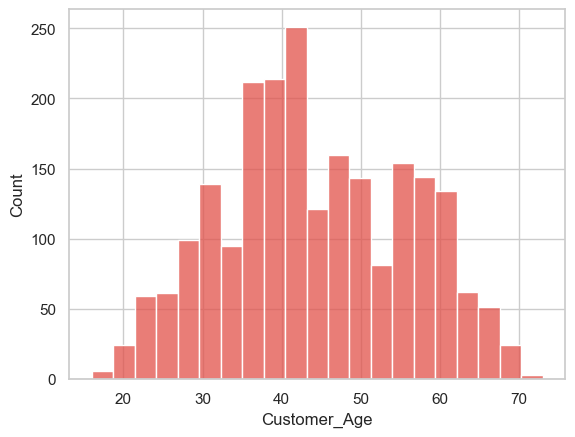

In [36]:
sns.histplot(data=df, x='Customer_Age')

Disini kita bisa melihat bahwa rata-rata itu berada di rentang umur 40 an,tapi disini saya mau melihat distribusi umur antara customer,atau distribusi 0 berdasarkan kolom responss,Untuk melihat distribusi berdasarkan  kolom response,kita dapat melihat nya dengan menggunakan ```hue```:

<Axes: xlabel='Customer_Age', ylabel='Count'>

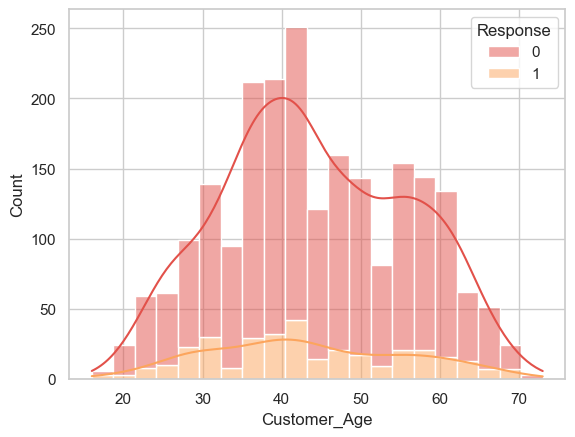

In [37]:
sns.histplot(data=df, x='Customer_Age', hue='Response', multiple='stack', kde=True)

Disini kita bisa melihat bahwa distribusi itu hampir normal distibusi,sedangkan untuk yang response nya sama dengan 1 atau yang menerima penawaran campaign kita,itu distibusi nya bisa di lihat juga di atas.

Ini kurang lebih sama,kita tidak mendapat informasi yang signifikan, karena kita tidak melihat adanya perbedaan antara distribusi umur berdasarkan response.

Tapi bisa di lihat rata-rata customer kita itu berada di rentang 40 an.

## Education
Didalam Education ini,karena dia itu berisikan string,maka kita lihat dulu nilai uniq dari kolom ini.

In [38]:
df.Education.unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

Nilai uniq ini kurang lebih ada 5 nilai uniq values.Tapi untuk PhD sama Master,ini sudah sanat jelas sekali kan itu lulusan Phd dan Master,tapi untuk yang lainnya kita tidak tahu artinya apa,mungkin Basic hanya lulusan SMP atau SMA,dan untuk 2n Cycle mungkin itu under graduate 1,tapi untuk hal-hal seperti ini ada baiknya langsung tanya ke orang yang tau arti dari nilai value ini.

Tapi disini kita tidak tau dan di dataset nya tidak ada penjesalan nya,kita abaikan dulu.

Selanjutnya kita mau melihat untuk Education Customer kita itu paling banyak berasal dari Education apa??,apakah paling banyak lulusan Phd,Master atau apa.

<Axes: xlabel='Education', ylabel='count'>

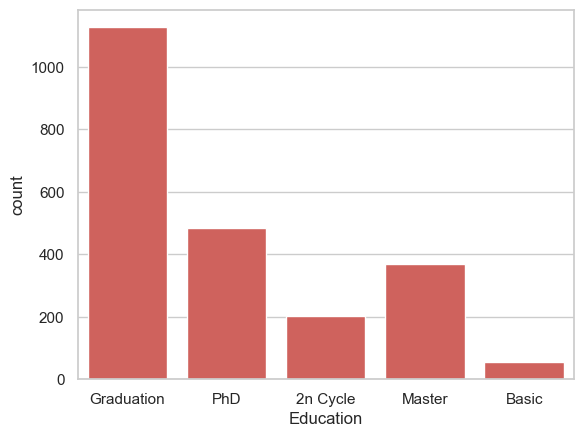

In [39]:
sns.countplot(data=df, x='Education')

Disini bisa kita lihat bahwa ternyata customer kita itu paling banyak lulusan Graduation

Tapi kita juga selalu ingin melihat hubungan dengan target variabel yaitu response,maka kita akan menambahkan ```hue```

<Axes: xlabel='Education', ylabel='count'>

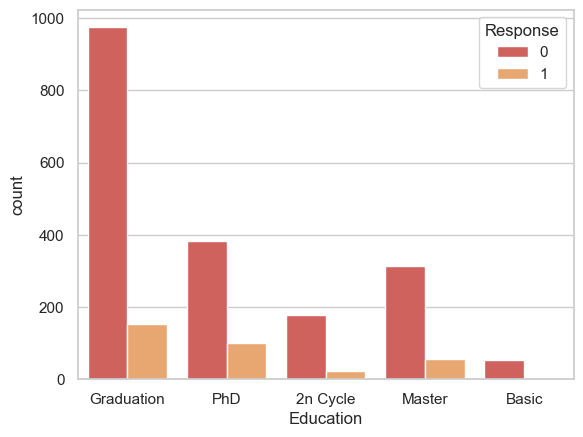

In [40]:
sns.countplot(data=df, x='Education', hue='Response')

Disini dapat dilihat,untuk Graduation,barcode nya kurang lebih seperti di atas,tapi karena ini tidak ada angka untuk mengetahui berapa persen client kita yang lulusan graduation menerima penawaran campaign kita,maka dari itu disini saya buat function untuk menampilkan persentase nya.

In [41]:
def barPerc(df,xVar,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable 
        ax: Axes object (for Seaborn Countplot/Bar plot or
                         pandas bar plot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")

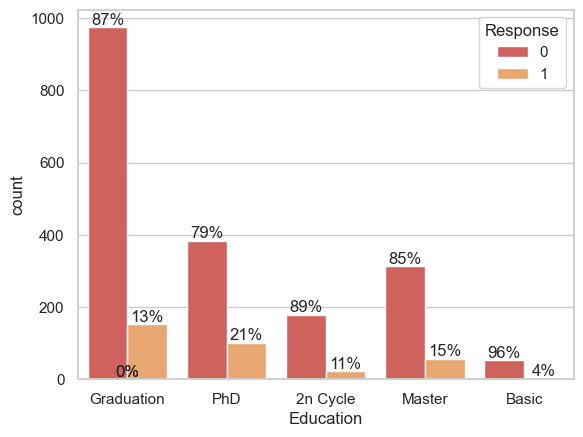

In [42]:
ax = sns.countplot(x='Education', hue='Response', data=df)
barPerc(df, 'Education', ax)

# Phd memiliki ketertarikan paling tinggi untuk menerima penawaran campaign

Dsini kita sudah mendapatkan persentase nya,dimana untuk graduation ada sekitar 13% yang menerima atau yang mengambil penawaran campaign kita,ternyata bahwa PhD itu paling tinggi dari total keseluruhan customer kita yang lulusan PhD itu ada 21% yang menerima penawaran campaign kita,atau bisa di bilang rata-rata ada kecenderungan ketika customer kita itu udah lulusan PhD itu lebih banyak yang bakal menerima campaign kita,Karena bisa kita lihat dari visualisasi kita.Dan untuk Basic itu adalah yang paling sedikit.

Selain dari Education,karena disini juga kolom yang ke 5 adalah Income,maka kita bisa menghubungkan Income dengan Education,kan biasanya kalau misalkan Education nya makin tinggi pasti Income nya juga makin tinggi.

Kita akan melihat korelasi antara Education dengan Icoome dan juga target variabel kita taitu response,untuk melakukan itu kita bisa melakukan:

(0.0, 175000.0)

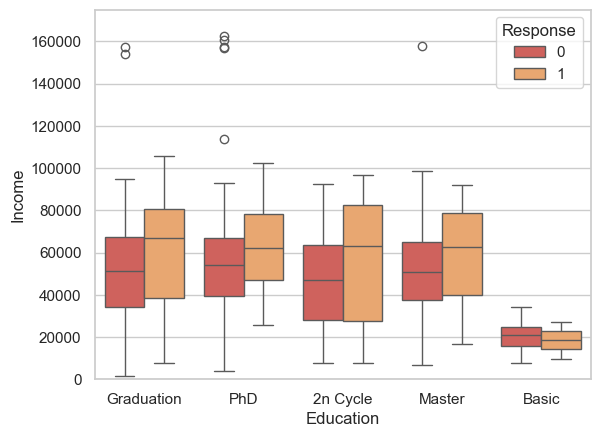

In [43]:
sns.boxplot(data =df , x='Education', y='Income', hue='Response')
plt.ylim(0, 175000)

# Income yang lebih tinggi cenderung menerima/membeli penawaran campaign

Disini kita dapat melihat untuk Graduation,PhD,2n Cycle dan juga Master,itu rata-rata memiliki Income yang sama,tapi disini ada satu interisting yang menarik,bahwa untk customer yang menerima atau membeli penawaran campaign kita itu memiliki rata-rata Income yang lebih tinggi,coba lihat box yang berwarna orange,mean nya itu selalul lebih tinggi dari pada customer yang lulusan Graduation tapi tidak mengambil penawaran campaign kita.

Disini kita dapat melihat bahwa Income yang lebih tinggi cenderung menerima atau membeli penawaran campaign.

## Marital Status
Seperti biasa kita harus melihat dulu kolom nya.

In [44]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25


In [46]:
df.Marital_Status.unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

Marital Status ini sudah jelas ini adalah status perkawinan,disini ada Divorced,Single,Married,Together,Single,dan lain lain.

Disini secara logika,pasti YOLO,Alone,dan Absurd itu mungkin sama,maka dari itu disini kita akan menganggap bahwa ketika ini adalah single,untuk melakukan itu kita dapat melakukan seperti ini:

In [47]:
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['YOLO', 'Alone' , 'Absurd'] else str(x))

JIka kita lihat ini akan berubah

In [48]:
df.Marital_Status.unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow'], dtype=object)

Selanjutnya kita akan melakukan visualisasi dengan hal yang sama seperti Education,namun kita akan mengubah X nya menjadi Marital_Status.

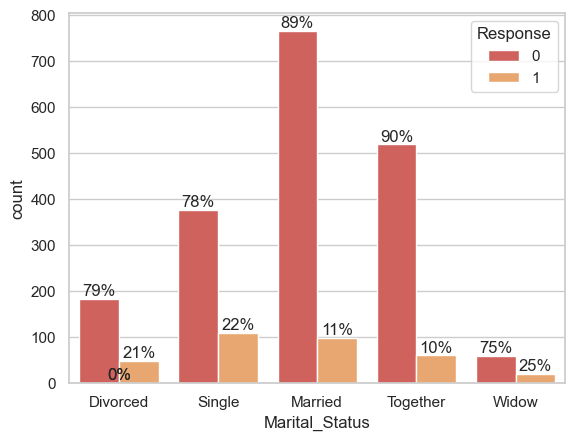

In [49]:
ax = sns.countplot(x='Marital_Status', hue='Response', data=df)
barPerc(df, 'Marital_Status', ax)

# Ada kecenderungan jika customer tinggal sendiri/membiayai sendiri hidup cenderung membeli/menerima penawaran campaign

Disini kita bisa melihat ada hal yang menarik untuk Divorced,Single dan Widow,itu melebihi 20%,dari total keseluruhan per Marital Status,sedangkan Married,dan Together itu hanya sekitar 10-11%.

Dari sini kita sudah mendapatkan insight baru,dari sini saja kita dapat melihat orang-orang yang cenderung tinggal sendiri ada kecenderungan membeli atau menerima penawaran campaign.